In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import missingno as ms

## Data Reading

In [185]:
train=pd.read_csv("C:/Users/USER/OneDrive/Masaüstü/Denemeler/Stroke Prediction/train_2v.csv")
test=pd.read_csv("C:/Users/USER/OneDrive/Masaüstü/Denemeler/Stroke Prediction/test_2v.csv")
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [186]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [187]:
train_missing_datas=train.isna().sum()
train_missing_datas

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [188]:
test_missing_datas=test.isna().sum()
test_missing_datas

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


<Axes: >

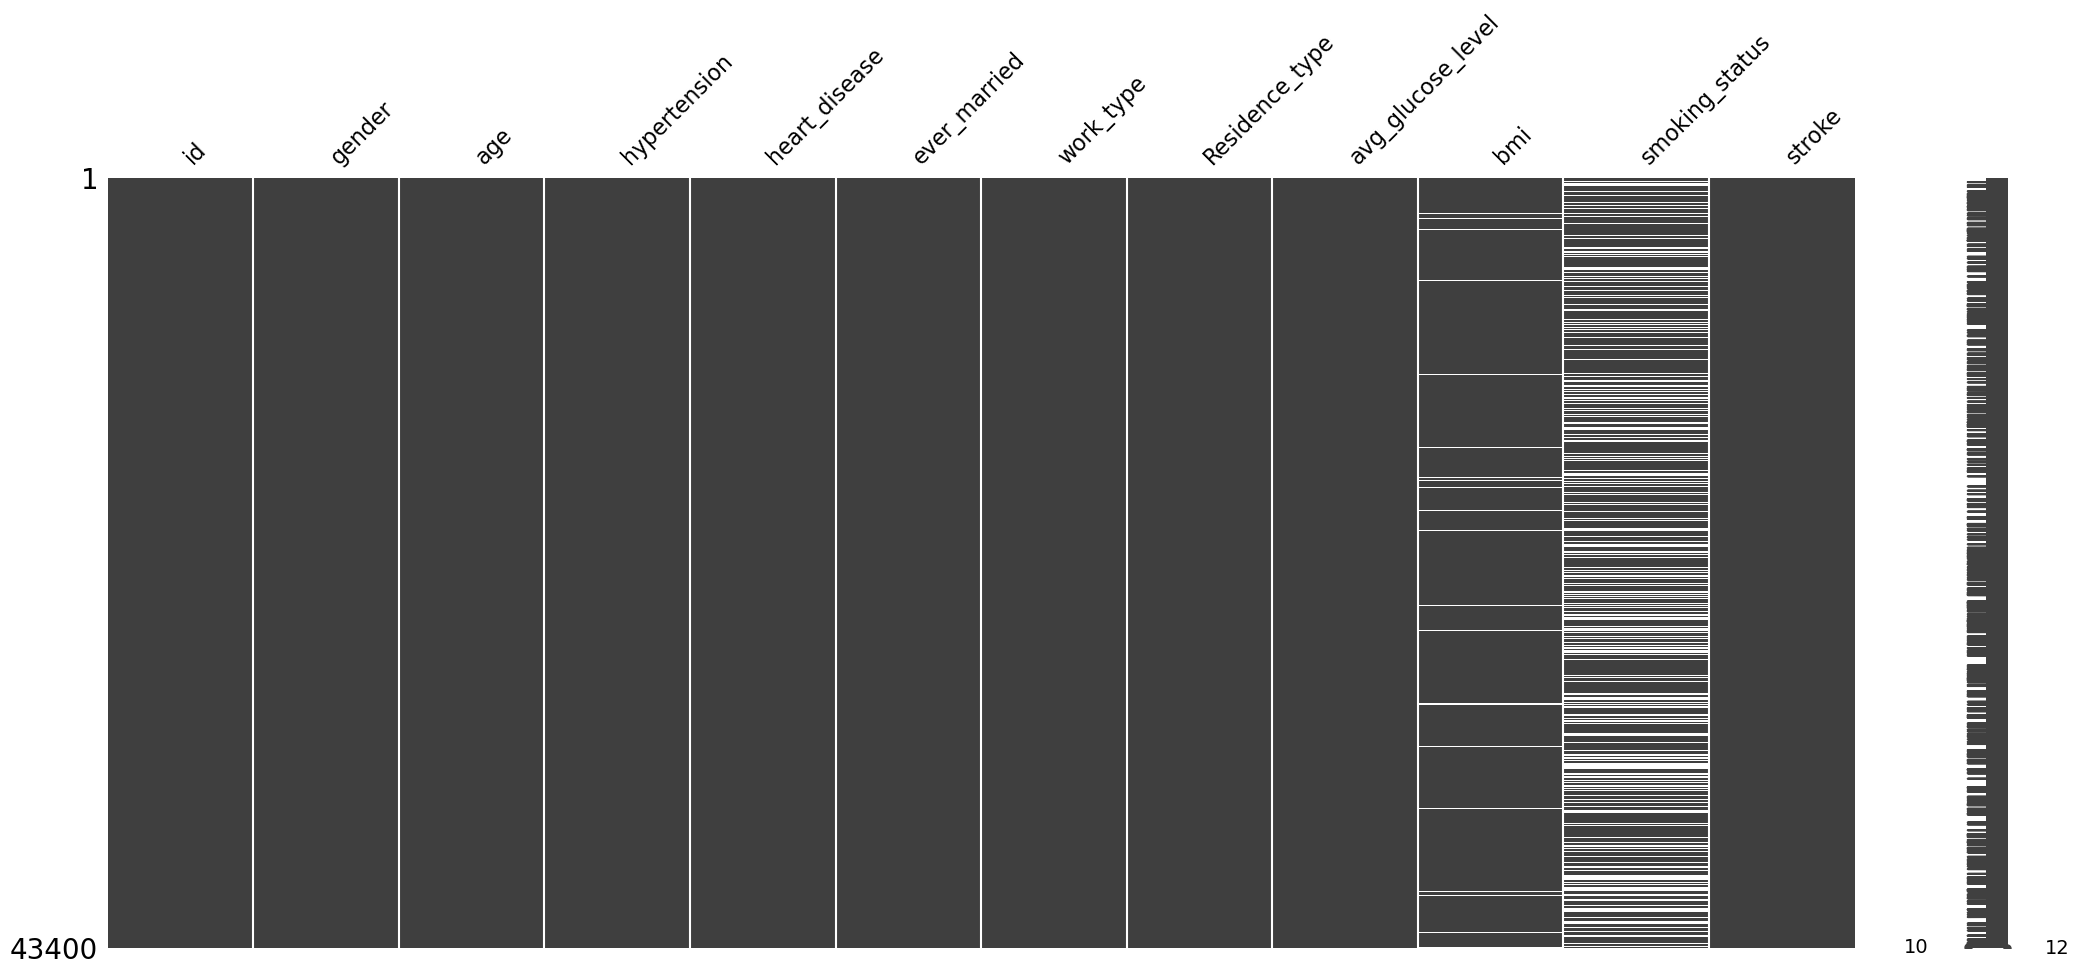

In [190]:
ms.matrix(train)

In [191]:
train_data=train.dropna(axis=0, how="any")
test_data=test.dropna(axis=0, how="any")

<Axes: >

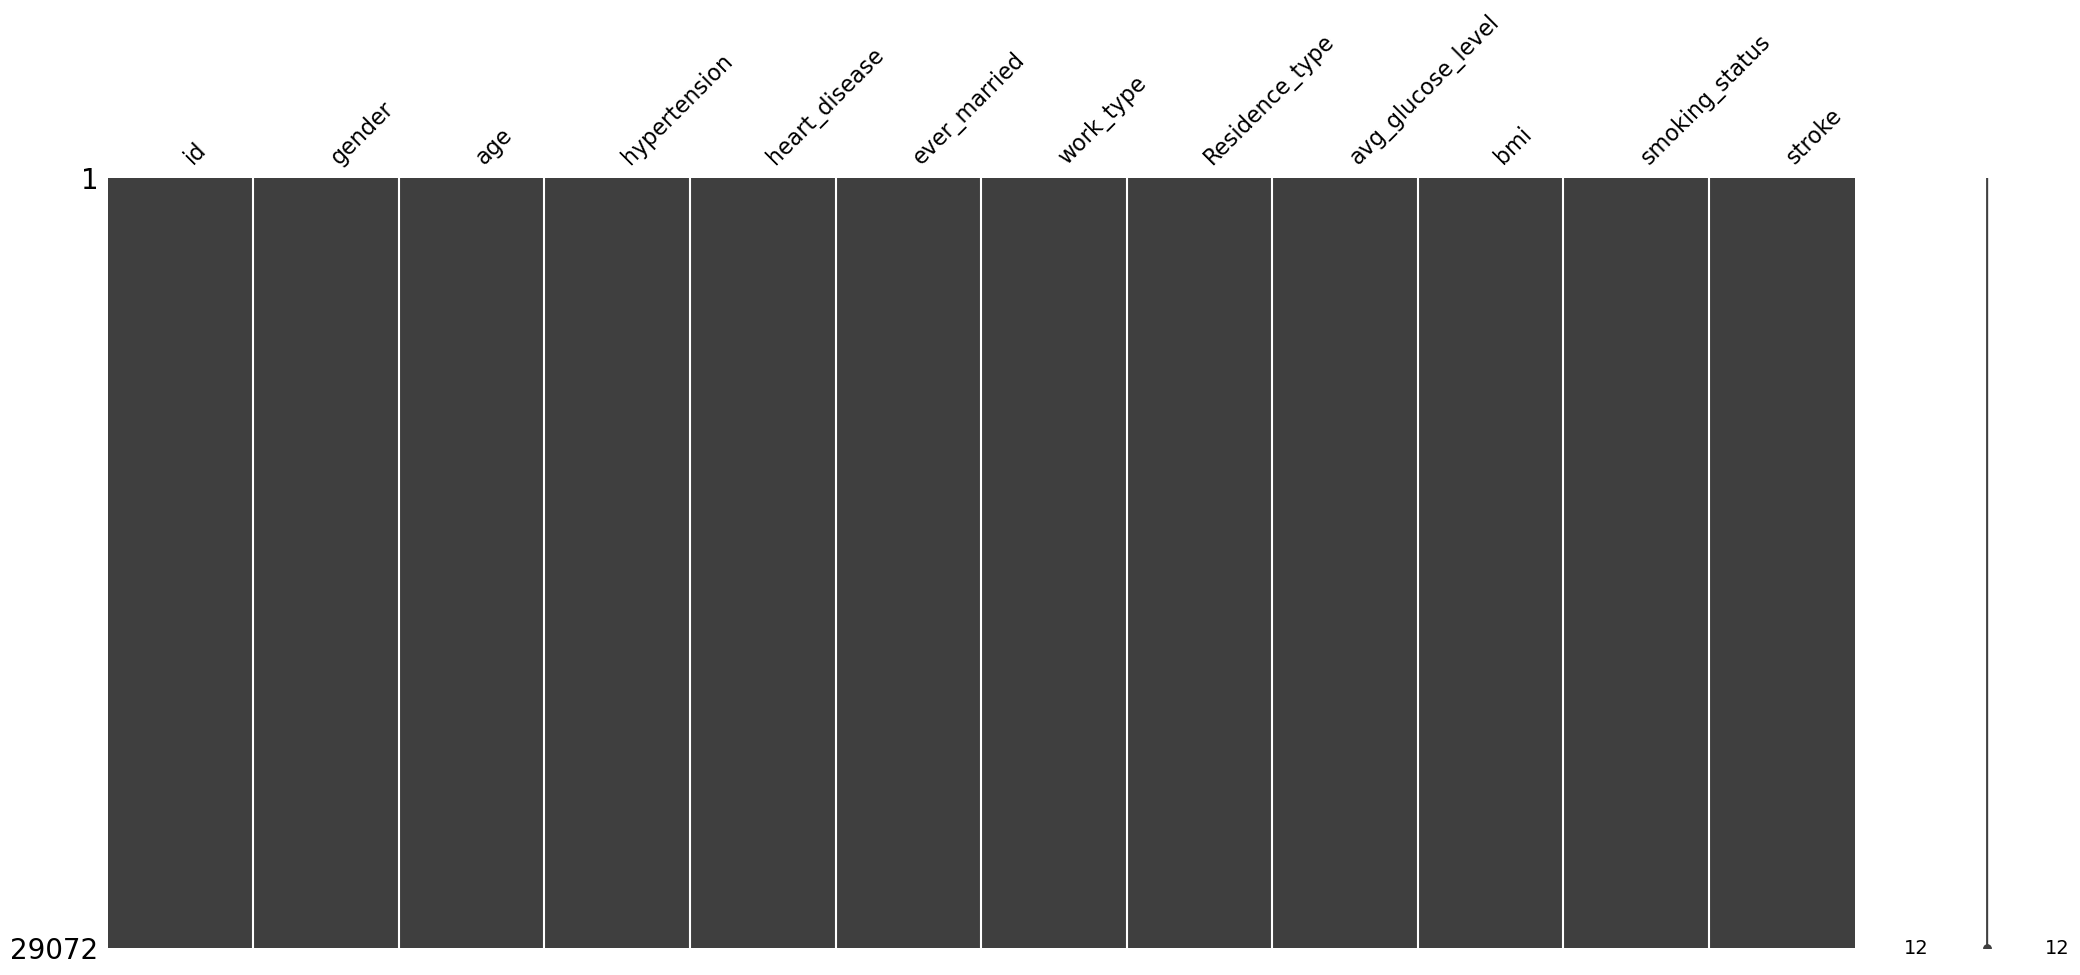

In [192]:
ms.matrix(train_data)

<Axes: >

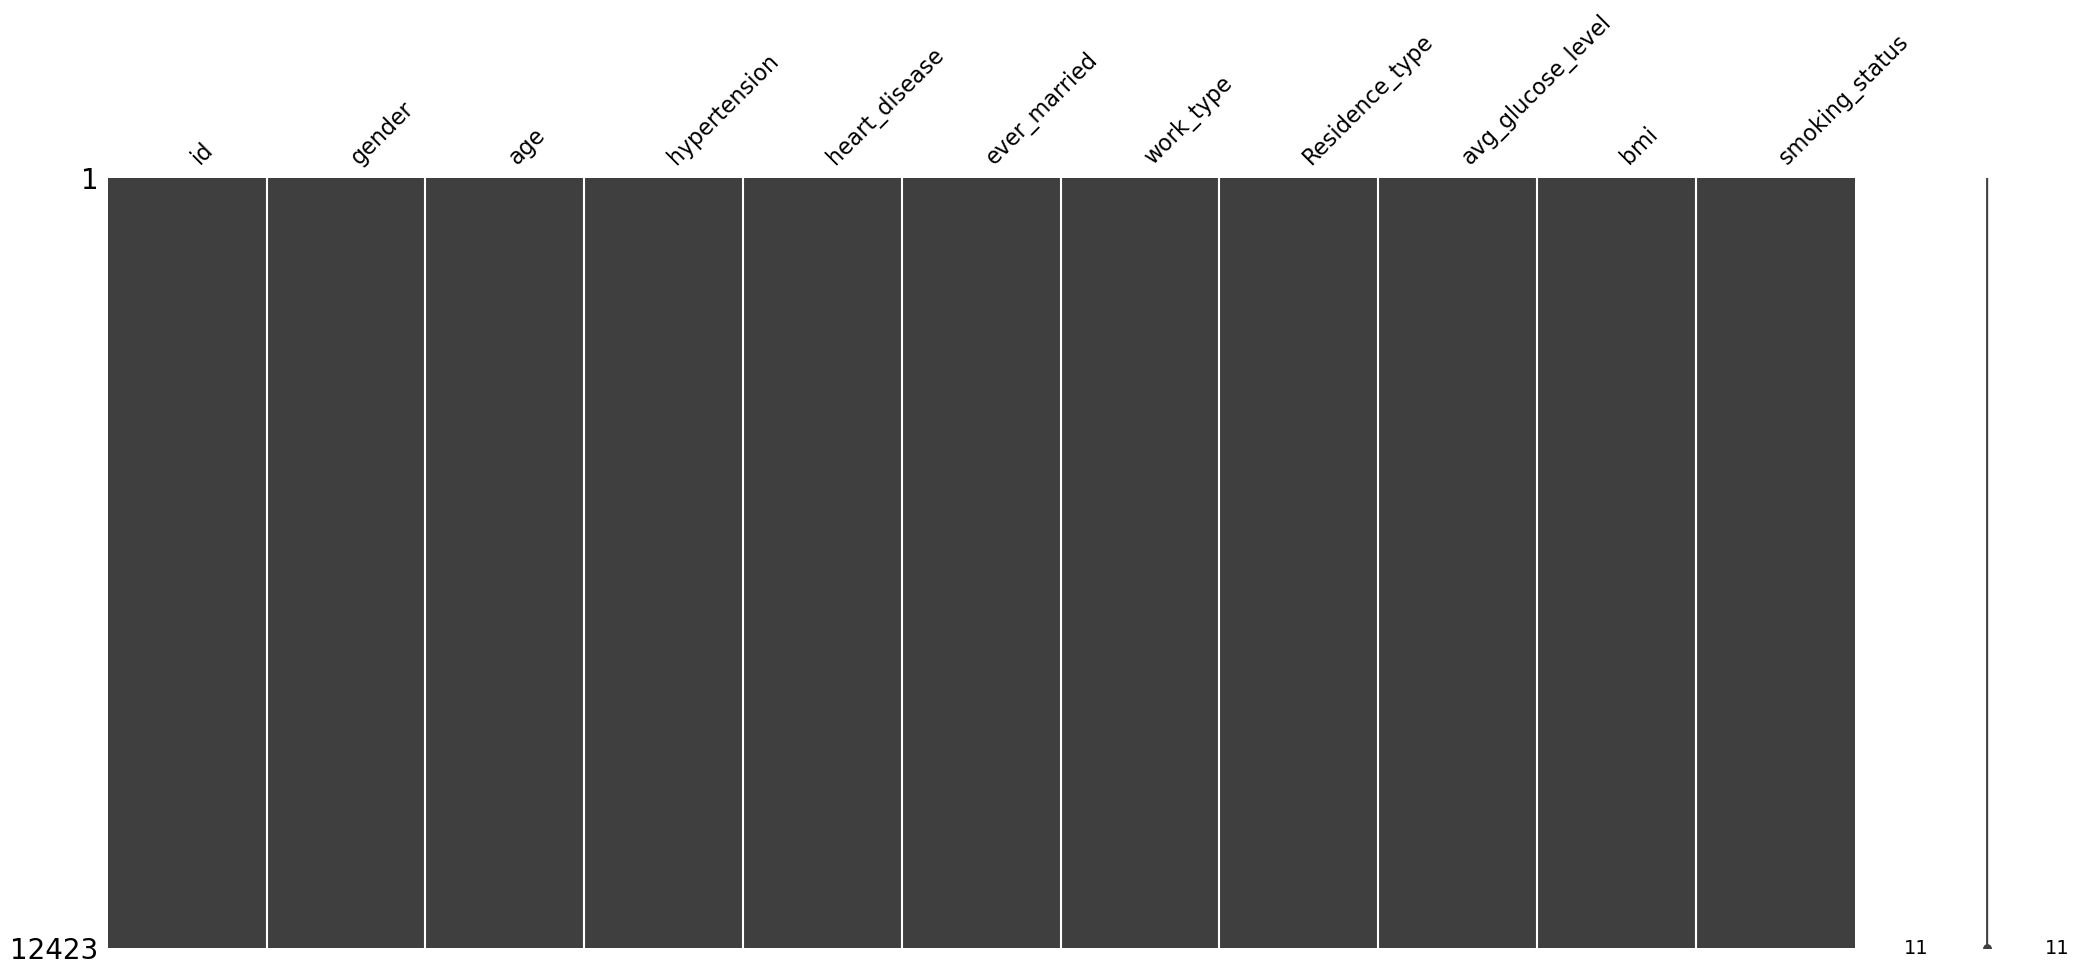

In [193]:
ms.matrix(test_data)

In [194]:
train_data["stroke"].value_counts()

stroke
0    28524
1      548
Name: count, dtype: int64

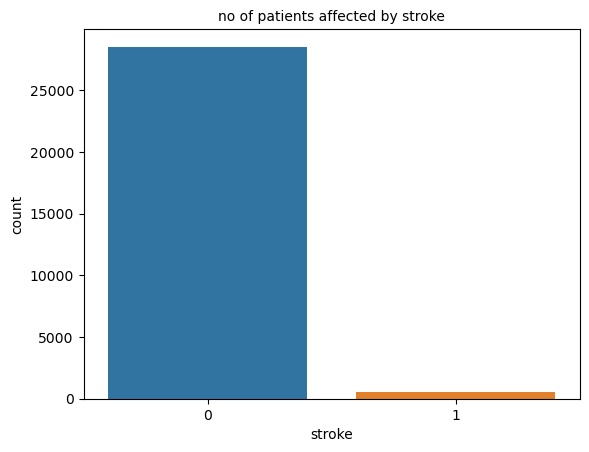

In [195]:
sns.countplot(x=train_data["stroke"])
plt.title("no of patients affected by stroke", fontsize=10)
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

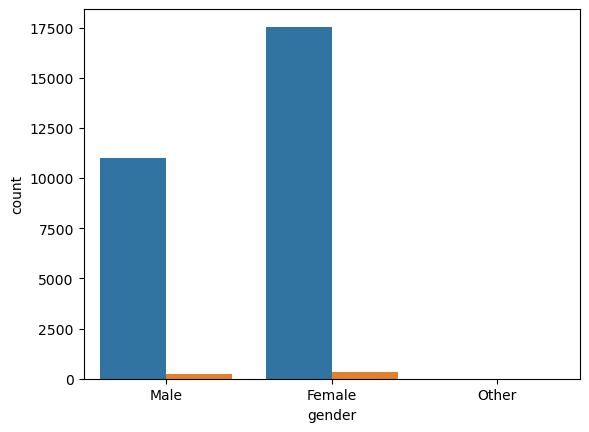

In [196]:
sns.countplot(x=train_data["gender"], hue=train_data["stroke"])
plt.title("gender vs stroke", fontsize=15)
plt.show()

## string to int conversion

In [197]:
str_data_train=train_data.select_dtypes(include=["object"])
str_data_test=test_data.select_dtypes(include=["object"])
int_data_train=train_data.select_dtypes(include=["integer", "float"])
int_data_test=test_data.select_dtypes(include=["integer", "float"])

In [198]:
from sklearn.preprocessing import LabelEncoder

In [199]:
label=LabelEncoder()
train_features=str_data_train.apply(label.fit_transform)
train_features=train_features.join(int_data_train)
train_features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [200]:
test_features=str_data_test.apply(label.fit_transform)
test_features=test_features.join(int_data_test)
test_features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


In [201]:
xtrain=train_features.drop(["stroke"], axis=1)
ytrain=train_features["stroke"]


In [202]:
xtrain.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3


In [203]:
ytrain.head()

1    0
3    0
6    0
7    0
8    0
Name: stroke, dtype: int64

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain)

## Naive Bayes

In [205]:
from sklearn.naive_bayes import GaussianNB

In [206]:
model=GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [207]:
predict=model.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [208]:
test_score=model.score(X_test, y_test)
print("Naive Bayes Score:", test_score)

Naive Bayes Score: 0.974545954870666


## Confusion Matrix

In [209]:
Naive_Bayes_Confusion_Matrix=pd.crosstab(y_test, predict)
Naive_Bayes_Confusion_Matrix

col_0,0,1
stroke,,
0,7078,62
1,123,5


## Report for Naive Bayes

In [210]:
from sklearn.metrics import classification_report
nbreport=classification_report(y_test, predict)
print(nbreport)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7140
           1       0.07      0.04      0.05       128

    accuracy                           0.97      7268
   macro avg       0.53      0.52      0.52      7268
weighted avg       0.97      0.97      0.97      7268



## Decision Tree

In [211]:
from sklearn.tree import DecisionTreeClassifier

In [212]:
dt_model=DecisionTreeClassifier(max_depth=8)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [213]:
y_predict=dt_model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [214]:
dt_score=dt_model.score(X_test, y_test)
print("Decision Tree Score:", dt_score)

Decision Tree Score: 0.9790864061640066


## Report For Decision Tree

In [215]:
dt_confusion_matrix=pd.crosstab(y_test, y_predict)
dt_confusion_matrix

col_0,0,1
stroke,,
0,7114,26
1,126,2


In [216]:
dt_classification_report=classification_report(y_test, y_predict)
print(dt_classification_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7140
           1       0.07      0.02      0.03       128

    accuracy                           0.98      7268
   macro avg       0.53      0.51      0.51      7268
weighted avg       0.97      0.98      0.97      7268



## Random Forest

In [217]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)

In [218]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [219]:
rfc_predict=rfc.predict(X_test)

In [220]:
rfc_score=rfc.score(X_test, y_test)
rfc_score

0.9823885525591635

## Report for Random Forest

In [221]:
rfc_confusion_matrix=pd.crosstab(y_test, rfc_predict)
rfc_confusion_matrix

col_0,0
stroke,
0,7140
1,128


In [222]:
rfc_classification_report=classification_report(y_test, rfc_predict)
print(rfc_classification_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7140
           1       0.00      0.00      0.00       128

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.97      0.98      0.97      7268



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [223]:
from sklearn.neural_network import MLPClassifier

In [224]:
mlp=MLPClassifier()

In [225]:
mlp.fit(X_train, y_train)
mlp_pred=mlp.predict(X_test)

In [226]:
mlp_score=mlp.score(X_test, y_test)
mlp_score

0.9823885525591635

# Cross Validation Score
## Naive Bayes

In [183]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, xtrain, ytrain, cv=20, scoring="accuracy").mean()

0.9757842475511938

## Decision Tree

In [171]:
cross_val_score(dt_model, xtrain, ytrain, cv=20, scoring="accuracy").mean()

0.9789144690442676

## Random Forest Classifier

In [227]:
cross_val_score(rfc, xtrain, ytrain, cv=20, scoring="accuracy").mean()

0.9811503212534707

## Multi Layer Perceptron

In [184]:
cross_val_score(mlp, xtrain, ytrain, cv=20, scoring="accuracy").mean()

0.9693837679666695

# PCA

In [228]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(xtrain)

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain)

# PCA Naive Bayes

In [231]:
model_2=GaussianNB()
model_2.fit(X_train, y_train)

GaussianNB()

In [232]:
model_2_predict=model_2.predict(X_test)
model_2_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [248]:
model_2_score=model_2.score(X_test, y_test)
print("PCA Naive Bayes",model_2_score)

PCA Naive Bayes 0.9756466703357182


## PCA Decision Tree

In [236]:
pca_decision_tree_model=DecisionTreeClassifier()
pca_decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [247]:
pca_decision_tree_model_score=pca_decision_tree_model.score(X_test, y_test)
print("PCA Decision Tree Score",pca_decision_tree_model_score)

PCA Decision Tree Score 0.9631260319207485


## PCA Random Forest

In [238]:
pca_random_forest_model=RandomForestClassifier()
pca_random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [246]:
pca_random_forest_score=pca_random_forest_model.score(X_test, y_test)
print("PCA MLP Score",pca_random_forest_score)

PCA MLP Score 0.9814254265272427


# PCA Multi Layer Perceptron

In [243]:
pca_mlp_model=MLPClassifier()
pca_mlp_model.fit(X_train, y_train)

MLPClassifier()

In [245]:
pca_mlp_score=pca_mlp_model.score(X_test, y_test)
print("PCA MLP Score",pca_mlp_score)

PCA MLP Score 0.9814254265272427
